# Gram-Schmidt, QR Decomposition, and Least Squares

As we saw in class, the Gram-Schmidt (from here on: GS) process involves repeated projection of vectors onto other vectors resulting in transforming an arbitrary matrix into an *orthonormal* matrix. By keeping track of the process, we compute a *QR decomposition* of a matrix. Today we will code algorithms for Gram-Schmidt and QR Decomposition as learned in class. We will see how QR decomposition gives us a straightforward way of solving Least Squares problems and compare the algorithm to the LU algorithm from last week's lab.

> ## Make a copy of this notebook (File menu -> Make a Copy...)

## Projections

The Gram-Schmidt algorithm proceeds by projecting vectors onto other vectors. In this first part, we will code a `project(u,v)` method that will return the orthogonal projection of a vector *v* onto the vector *u*.

**Question 1** We define $\mbox{proj}_u(v)$ to be the projection of $v$ onto $u$. 
1. Write down a formula for this projection using dot products, as learned in class. <br><br>
1. What should the dot product of of $u$ and $v-\mbox{proj}_u(v)$ be? Why? Check that this is indeed the case with your formula given above.

**Question 2** Write a function `project(u,v)` that takes two vectors *u* and *v* and returns the orthogonal projection of *v* onto *u*. Recall that if *u* and *v* are vectors (1-D arrays), `u@v` returns their dot product. Test your code by computing a few projections by hand, then using your function. Does your code returns projections that satisfy the second condition from Question 1? 

You may have noticed that for many vectors that *should* be orthogonal, you don't get exactly zero, but rather a very small positive number. This is a very typical occurence for floating point numbers. We often need to check whether a particular quantity is zero. Due to this floating point issue, the code `a==0` is rarely sufficient. Instead, we define a *tolerance* $\tau$: we say that $a=0$ for our purposes if $|a|<\tau$. For this lab (and most others), we will take $\tau=10^{-8}$.

**Question 3** Recall that if $u=0$, then $\mbox{proj}_u(v) = 0$. Add this to your code for *project(u,v)*. Since vectors are rarely *exactly* zero, define a vector to be zero if its norm is less than $10^{-8}$. You can use `np.norm(v)` to find a vector's norm, but recall that the dot product of a vector with itself is the square of the norm, so it may be faster to use that and avoid square roots....

## Gram-Schmidt

Suppose that we have an $m\times n$ matrix *A* whose columns are $u_1,\ldots,u_n$. We aim to find an *orthonormal* basis for the column space of *A* by using the Gram-Schmidt process. However, the Gram-Schmidt process is more general: it takes any linearly independent list of vectors and returns an orthonormal basis for the space they span. We implement the *modified Gram-Schmidt* process, as it substantially reduces cumulative error.

**Question 4** What does it mean for a set of vectors $v_1\ldots,v_n$ to be *orthogonal*? What does it mean for them to be *orthonormal*?

**Question 5** Consider the following pseudocode for the Gram-Schmidt (GS) and Modified Gram-Schmidt (MGS) algorithms for a set of *n* column vectors in an array *A*:
> ###### Gram-Schmidt
> $B = A$<br>
> for $j = 1\ldots n$:<br>
>   for $k = 1\ldots (j−1)$:  
>      $B_j = B_j − proj_{B_k}(A_j)$<br>
>    $B_j = B_j / |B_j|$  
> return B


> ###### Modified Gram-Schmidt
> $B = A$<br>
> for $j = 1\ldots n$:<br>
>   $\hspace{0.175in}B_j = B_j / |B_j|$<br>
>   for $k = (j+1)\ldots n$:  
>      $B_k = B_k − proj_{B_j}(B_k)$<br>
> return B

($A_j$ denotes the $j^{th}$ column of *A*, $|A_j|$ denotes its norm, and $A_j\cdot B_k$ denotes the dot product.)

By carrying out both procedures by hand on a matrix with three columns, explain the difference between the two in words. On the homework you will see the difference in a computational context.

**Question 6** Write a function `ModGramSchmidt(A)` that takes a matrix $A$ and returns a matrix whose columns form an orthonormal basis for $C(A)$ using MGS. Since we insert any set of vectors as columns of a matrix, this implements Modified Gram-Schmidt. Test your code by showing that the vectors that result are orthonormal.

**Question 7** The function you wrote in the previous question computes the *Q* in the QR decomposition. Write a `QR(A)` function that returns both *Q* and *R*. Test your code. Importantly, do not generate *R* using a matrix multiplication, as this is inefficient: Note that you are very likely computing the entries of *R* as you compute *Q*! 

## Using QR for Least Squares

**Question 8** Recall that the *least-squares* solution for $Ax=b$ is the solution to the *normal equation* $A^TAx=A^Tb$. Suppose we have a QR decomposition $A=QR$. By substituting this last equation into the normal equation, show that the least squares solution is the solution to $Rx=Q^Tb$. What property of $R$ allows this equation to be solved by back-substitution?

**Question 9** Write a function called `QRLeastSquares(A,b)` that takes a matrix $A$ and a vector $b$, and returns the least squares solution to $Ax=b$ using QR decomposition and back-substitution. Test your function by recomputing the best fit line from Question 6 from Lab 6.

## Back to Machine Learning

### What is Machine Learning?

In this lab, we are looking at *supervised machine learning*. In this paradigm, we *train* a *classifier* on a *training set* from the data, for which labels are known. We then *test* the classifier on the rest of the data. In the example above, you used least squares to train the classifier - an affine function with unknown parameters. Discovering the 'best' values for the parameters is the *training*. *Testing* would involve taking a unknown point and seeing the performance of your classifier. That is, experimentally finding the error rate. On the homework, you will compute theoretical error rates for your classifier. In practice, this is rarely possible.

## Handwriting Recognition

In the *data* folder, you will find files named *train-images-idx1-ubyte* and *train-labels-idx1-ubyte*. These files consist of 60,000 grayscale images of handwritten digits and labels for them. Each image is a $28\times28$ array of values between 0 and 255. Each number represents how gray that pixel is, where 0 is black and 255 is white. A set of functions designed to read this data into arrays is provided in the file *MNISTHandwriting.ipnyb*.

**Note:** The data comes from the MNIST Handwritten Digit Database. The original files and a lot of information about them can be found [here](http://yann.lecun.com/exdb/mnist/ "MNIST Database").

To run the file referenced above, and read the images and their labels into arrays, use the following code:
```python
from MNISTHandwriting import readimgs
images = readimgs('./data/train-images-idx3-ubyte')[0].astype('float')
labels = readimgs('./data/train-labels-idx1-ubyte')[0].astype('float')
```

**Note:**  The readimgs command also returns the number of row and columns in each image, these are elements 1 and 2 of the array respectively. Feel free to read the code of the readimgs command! It contains some ideas that may be useful in your work. Note also that we cast the arrays to floats. The image data is in 8-bit integers for compactness reasons, but we will need floats in order to do any manipulation of the sort we need.

**Question 10** 
1. After running the above, the following code will display image number 10400 and its label. Display a few images and their labels to get a feel for the data.

```python
%matplotlib inline
import matplotlib.pyplot as plt

plt.gray()
plt.imshow(images[10400])
labels[10400]
```
&nbsp;&nbsp;&nbsp;&nbsp;2. What is the shape of the images array? (Hint: use `np.shape(A)` or `A.shape`) Can you explain why this makes sense?

(60000, 28, 28)
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 

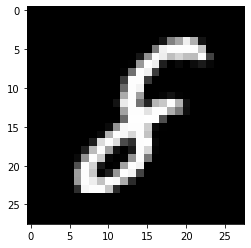

In [110]:
from MNISTHandwriting import readimgs
import numpy as np
images = readimgs('./data/train-images-idx3-ubyte')[0].astype('float')
labels = readimgs('./data/train-labels-idx1-ubyte')[0].astype('float')
%matplotlib inline
import matplotlib.pyplot as plt

plt.gray()
plt.imshow(images[503])
labels[503]

print(np.shape(images))
print(images)
#This is the shape of our images array because we have 60000 different images, each of which is a 28 by 28 pixeled image. 

Our strategy to label each image as being a zero or not a zero will be as follows:

* Consider each image as a vector in $\mathbb{R}^{28\times28}=\mathbb{R}^{784}$. <br><br>
* Remove all vector elements corresponding to pixels that are black in all 60,000 images, as these pixels provide no useful data to distinguish between digits. This will reduce the dimension in which the images live. <br><br>
* Use the label data to read off which images correspond to 0 and which don't. Use that to construct a vector consisting of just 1's and -1's, just like we did with the cluster above. <br><br>
* Use least-squares to train an affine model. <br><br>
* Decide how to use the model to test an image (like in Question 15 from Lab 6 and Question 3 from the homework). <br><br>
* Test our model on another 10,000 images provided in the MNIST database.

**Question 11 -- From $28\times28$ to $784$** We want each image to be a vector in $\mathbb{R}^{784}$. Right now, each image is a square of dimension $28\times28$. The easiest way to do this is just to take the second row of pixels and join to the first, then the third to that, and so on until the 28th. Use the `np.reshape(A,(m,n))` command to do this. (Hint: you can do it with one `np.reshape` - no loops!)

In [99]:
newimage =np.reshape(images,(60000,784))
print(newimage.shape)
#plt.imshow(newimage[503])
#**figure out how to make this get rid of the 1 here. 
#newimage = np.reshape(newimage,)

(60000, 784)


**Question 12 -- Removing Common Black Pixels** Now that we've flattened our images, we want to find all columns in the array whose elements are all zero. Look back at the first lab and its homework to do this (again: no loops!). You want two outputs: the list of non-zero columns, and the array containing only those columns. You should find 717 non-zero columns. 

Lastly, create an array of size $60,000\times 718$, the first 717 columns of which are the non-zero ones above, and the last a column of ones. We will use this to do least squares in a bit.

In [100]:

thing = newimage.sum(axis=0)
nozero = np.nonzero(thing)[0]
#print(D)
print(len(nozero))
print(nozero)
print(newimage[:,nozero])
A = np.ones((60000,718))
A[:,:717] = newimage[:,nozero]

#array[:, [i, j]] helps you get the columns for the array of indices we have.
#cols = newimage[:,nozero]
#print(np.average(cols, axis=0))

717
[ 12  13  14  15  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 28

**Question 13 -- Constructing the Ideal Output Vector** Note that the *labels* vector contains the 'correct' label for each of the 60,000 images. Use it to construct a second vector, one which has $1$ for every image labeled 0, and $-1$ for all others. Again, you can do this using logical indexing rather than loops.

In [101]:
print(labels)
print(2*(labels==0)-1)
newlabels = 2*(labels==0)-1

[5. 0. 4. ... 5. 6. 8.]
[-1  1 -1 ... -1 -1 -1]


**Question 14 -- Training the Model** We want to find the least squares solution $\hat{x}$ to the matrix equation $Ax=v$, where $A$ is our filtered images matrix from Question 12, and $v$ is our idealized output vector from Question 13. As we did above, we do this by solving the normal equation $A^TAx=A^Tv$. 

* What is the size of the matrix $A^TA$?

Above, we solved the normal equations using LU or QR decomposition code. This would work just fine here, but given the size of our matrices, will take a very long time. We'd also have to deal with small errors, something we haven't done before.  Instead, we will use a built-in function to do least squares. 

The `np.linalg.lstsq(A,v,rcond=tol)[0]` command  returns the least squares solution $\hat{x}$ to $Ax=v$, where any number less than *tol* is treated as zero. For our purposes, a tolerance of $10^{-10}$ will be great. For convenience, run `import numpy.linalg as LA`, then reference the above command as `LA.lstsq(A,v,rcond=tol)[0]`.

The size of the matrix is 718 x 718.

In [102]:
tol = 10**(-10)
import numpy.linalg as LA
sol = LA.lstsq(A,newlabels,rcond=tol)[0]


Recall that the vector $\hat{x}$ gives the coefficients $a_1,\ldots,a_n,a_{n+1}$ of the affine function 

$$f(x_1,\ldots,x_n) = a_1 x_1 + a_2x_2 + \ldots +a_nx_n + a_{n+1}.$$ 

In our case, $n=717$. *Evaluating* our model on a given image means computing the value of this function on every image (that is, every ~~column~~ row of our images matrix). 

**Question 15 -- How to Use the Model** 
* How can you evaluate the model on all images with one command? (Hint: matrix multiplication!)
* If an image vector evaluates to a number greater than or equal to 0, we'll label it as being a zero. If it maps to a number less than or equal to 0, we'll label it as being non-zero. Use logical indexing to write code that evaluates your model on all images, then creates a *modelresults* vector that is 1 if the model thinks you have a zero, and -1 otherwise.

In [103]:
bhat = A @ sol
print(bhat)
modelresults = 2*(bhat >0)-1
print(modelresults)

[-0.82711851  0.77376361 -1.14818886 ... -1.09885844 -0.79512622
 -0.54558804]
[-1  1 -1 ... -1 -1 -1]


**Question 16 -- The Expected Error Rate of the Model** We'll test the model in two parts: first, we'll see what the error rate is on the training set we used to train the model. This will give us an *expected* error rate. To test on the training set, all we need to do is find where our results match our ideal output vector. Note that for two arrays *A* and *B* of the same shape, the code `A==B` returns an array of the same shape, with zeros for entries where A does not equal B, and ones for entries where it does. Use this to compute the expected error rate as a decimal or a percentage.

In [104]:
print(newlabels == modelresults)
print(60000-np.sum(newlabels == modelresults))
print(934/60000)
#1.49% error

[ True  True  True ...  True  True  True]
934
0.015566666666666666


**Question 17 -- Testing on New Images** To test on a new set of images, note that the files *t10k-images-idx3-ubyte* and *t10k-labels-idx1-ubyte* in the *data* subfolder contain 10,000 images and labels in the same format as our training set. Use code similar to what we used above to read the images and the labels, then create an ideal output vector from the labels. **Be sure to remove the same rows from your new image array as the rows you removed in the training set! That is, do NOT find all-black pixels again!** Once you've done that, apply the model you got above to this new set of images and compute your error rate.

In [142]:
def findnum (imagefile,labelfile,num):
    from MNISTHandwriting import readimgs

    images = readimgs('./data/'+ imagefile)[0].astype('float')
    labels = readimgs('./data/'+ labelfile)[0].astype('float')
    total, pix, pix= np.shape(images)
    newimage =np.reshape(images,(total,pix*pix))
    thing = newimage.sum(axis=0)
    nozero = np.nonzero(thing)[0]
    A = np.ones((total,len(nozero)+1))
    A[:,:len(nozero)] = newimage[:,nozero]
    newlabels = 2*(labels==num)-1
    sol = LA.lstsq(A,newlabels,rcond=10**(-10))[0]
    
    bhat = A @ sol
    modelresults = 2*(bhat >0)-1
    error = total-np.sum(newlabels == modelresults)
    return(error*100/total)
       
findnum('t10k-images-idx3-ubyte', 't10k-labels-idx1-ubyte',0)
    

1.11